# Exploratory Data Analysis 

In [1]:
#The data used for this analysis can be found here:
# https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?select=heart.csv
import pandas as pd
from pathlib import Path
import seaborn as sns

In [2]:
dat_raw=pd.read_csv(Path('heart.csv'))
dat_raw.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dat_raw.describe()

##### There are no missing values in any of the features. If there were, we would want to check if there are patterns in missingness, relationship between missing values and the outcome. Imputation can be done based on patterns found MAR, MCAR etc

In [5]:

from tableone import TableOne
cat = ['sex', 'cp', 'restecg', 'exng', 'slp', 'thall']
mytable = TableOne(dat_raw, list(dat_raw.columns), cat, groupby='output',pval=True)
print(mytable)

C:\Users\marth\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                      Grouped by output                                                  
                                Missing       Overall             0             1 P-Value
n                                                 303           138           165        
age, mean (SD)                        0    54.4 (9.1)    56.6 (8.0)    52.5 (9.6)  <0.001
sex, n (%)          0                 0     96 (31.7)     24 (17.4)     72 (43.6)  <0.001
                    1                      207 (68.3)    114 (82.6)     93 (56.4)        
cp, n (%)           0                 0    143 (47.2)    104 (75.4)     39 (23.6)  <0.001
                    1                       50 (16.5)       9 (6.5)     41 (24.8)        
                    2                       87 (28.7)     18 (13.0)     69 (41.8)        
                    3                        23 (7.6)       7 (5.1)      16 (9.7)        
trtbps, mean (SD)                     0  131.6 (17.5)  134.4 (18.7)  129.3 (16.2)   0.013
chol, mean

#### Based on the bivariate analysis, with 0.05 critical value, cholesteral levels and blood sugar are not good predictors of heart attack.

### Explore target variable

C:\Users\marth\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


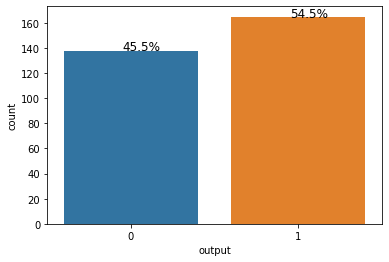

In [6]:
#check for distribution of the ouput
def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

ax=sns.countplot(x='output',data=dat_raw)
without_hue(ax, dat_raw.output)   


##### 54.5% of the patients have a high risk of heart attack while 45.5% have low risk of a heart attack. The output classes are relatively balanced, therefore no oversampling or undersampling techniques will be required in the modeling phase. 

### Explore continuous variables

C:\Users\marth\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


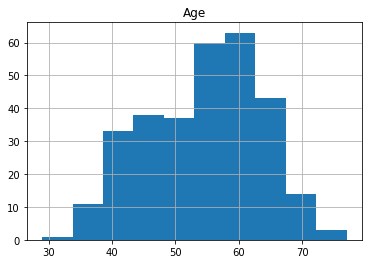

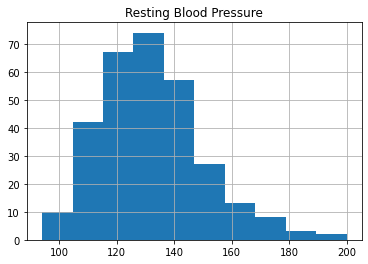

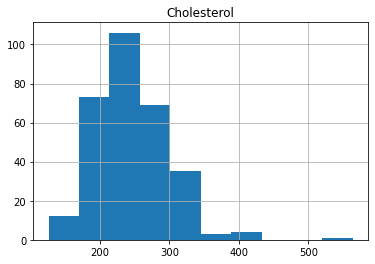

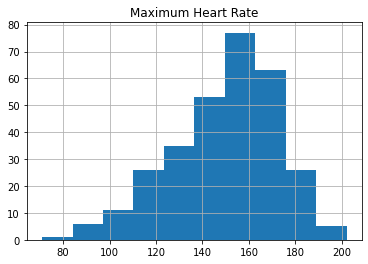

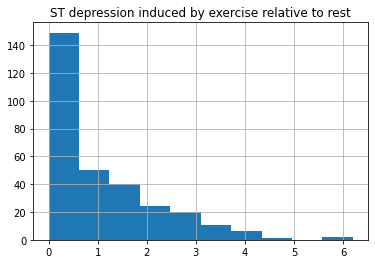

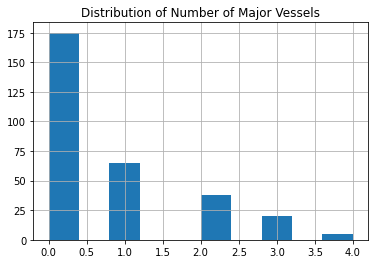

In [10]:
#Generate histograms for the continuous variables
import matplotlib.pyplot as plt
cont=['age', 'trtbps', 'chol', 'thalachh', 'oldpeak','caa']
cont_title=['Age','Resting Blood Pressure','Cholesterol','Maximum Heart Rate',
'ST depression induced by exercise relative to rest','Distribution of Number of Major Vessels']

for idx,feature in enumerate(cont):
    dat_raw.hist(column=feature)[0]
    plt.title(cont_title[idx])

##### The majority of patients are older than 40 years old. The distribution tends to be normal distribution with the peak being around 57 years old
##### Maximum heart rate is slightly skewed to the left
##### ST depression induced by exercise relative to rest is skewed to the right.
##### Cholesteral: Some patients have extremely high levels of cholesterol skewing the data to the right additional investigation may be required to check if the outliers are within reasonable measures.

C:\Users\marth\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


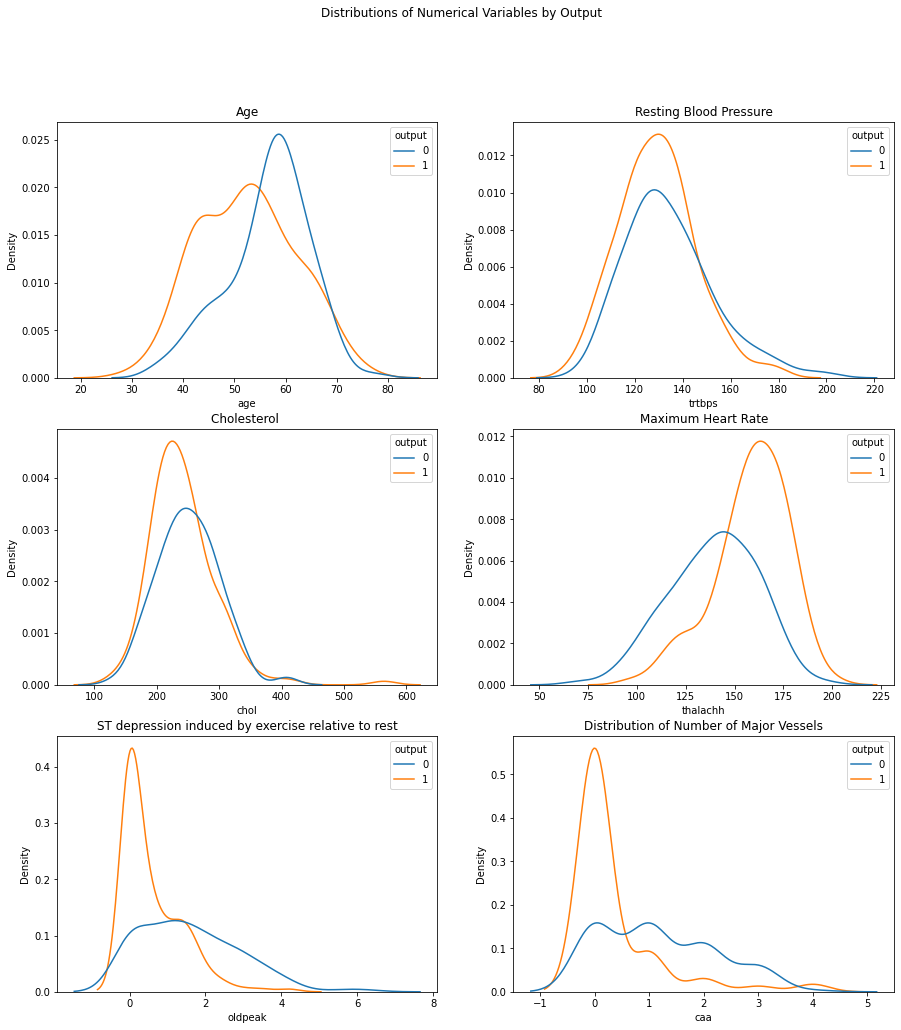

In [11]:
#Generate distributions for the continuous variables
_, axes = plt.subplots(3, 2, figsize=(15,16))
sns.kdeplot(data=dat_raw, x='age', hue='output', ax=axes[0, 0])
axes[0, 0].set_title('Age')

sns.kdeplot(data=dat_raw, x='trtbps', hue='output', ax=axes[0, 1])
axes[0, 1].set_title('Resting Blood Pressure')

sns.kdeplot(data=dat_raw, x='chol', hue='output', ax=axes[1, 0])
axes[1, 0].set_title('Cholesterol ')

sns.kdeplot(data=dat_raw, x='thalachh', hue='output', ax=axes[1, 1])
axes[1, 1].set_title('Maximum Heart Rate')  

sns.kdeplot(data=dat_raw, x='oldpeak', hue='output', ax=axes[2, 0])
axes[2, 0].set_title('ST depression induced by exercise relative to rest')

sns.kdeplot(data=dat_raw, x='caa', hue='output', ax=axes[2, 1])
axes[2, 1].set_title('Distribution of Number of Major Vessels')
plt.suptitle('Distributions of Numerical Variables by Output')
plt.show()

##### The distribution plots indicate that there is not difference between the mean of resting blood pressure among those with high risk of heart failture versus low risk of heart failure. The same conclusion can be drawn about cholesterol levels. This implies that resting blood pressure and cholorestol level may not be good predictors of heart attack.

### Explore categorical variables

C:\Users\marth\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


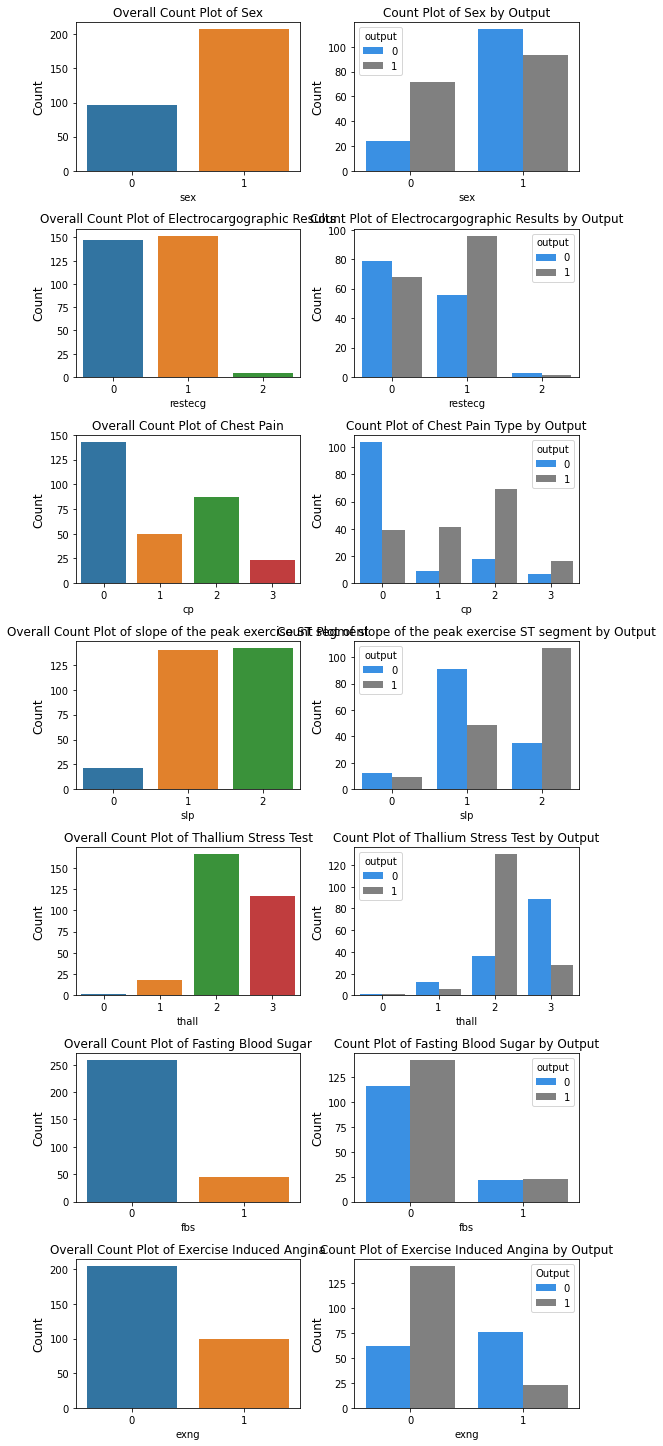

In [12]:

fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(8, 20))
sns.countplot(x='sex', data=dat_raw, ax=ax[0,0])
ax[0,0].set_ylabel('Count', fontsize=12)
ax[0,0].set_title('Overall Count Plot of Sex', fontsize=12)

sns.countplot(x='sex', hue='output', data=dat_raw, ax=ax[0,1], palette=('dodgerblue','gray'))
ax[0,1].set_ylabel('Count', fontsize=12)
ax[0,1].set_title('Count Plot of Sex by Output', fontsize=12)
plt.legend(title='Output')
plt.tight_layout()


#Electrocargographic Results
sns.countplot(x='restecg', data=dat_raw, ax=ax[1,0])
ax[1,0].set_ylabel('Count', fontsize=12)
ax[1,0].set_title('Overall Count Plot of Electrocargographic Results', fontsize=12)


sns.countplot(x='restecg', hue='output', data=dat_raw, ax=ax[1,1], palette=('dodgerblue','gray'))
ax[1,1].set_ylabel('Count', fontsize=12)
ax[1,1].set_title('Count Plot of Electrocargographic Results by Output', fontsize=12)
plt.legend(title='Output')
plt.tight_layout()

#chest pain
sns.countplot(x='cp', data=dat_raw, ax=ax[2,0])
ax[2,0].set_ylabel('Count', fontsize=12)
ax[2,0].set_title('Overall Count Plot of Chest Pain', fontsize=12)


sns.countplot(x='cp', hue='output', data=dat_raw, ax=ax[2,1], palette=('dodgerblue','gray'))
ax[2,1].set_ylabel('Count', fontsize=12)
ax[2,1].set_title('Count Plot of Chest Pain Type by Output', fontsize=12)
plt.legend(title='Output')
plt.tight_layout()


#SLP
sns.countplot(x='slp', data=dat_raw, ax=ax[3,0])
ax[3,0].set_ylabel('Count', fontsize=12)
ax[3,0].set_title('Overall Count Plot of slope of the peak exercise ST segment', fontsize=12)


sns.countplot(x='slp', hue='output', data=dat_raw, ax=ax[3,1], palette=('dodgerblue','gray'))
ax[3,1].set_ylabel('Count', fontsize=12)
ax[3,1].set_title('Count Plot of slope of the peak exercise ST segment by Output', fontsize=12)
plt.legend(title='Output')
plt.tight_layout()

#Thallium Stress Test
sns.countplot(x='thall', data=dat_raw, ax=ax[4,0])
ax[4,0].set_ylabel('Count', fontsize=12)
ax[4,0].set_title('Overall Count Plot of Thallium Stress Test', fontsize=12)


sns.countplot(x='thall', hue='output', data=dat_raw, ax=ax[4,1], palette=('dodgerblue','gray'))
ax[4,1].set_ylabel('Count', fontsize=12)
ax[4,1].set_title('Count Plot of Thallium Stress Test by Output', fontsize=12)
plt.legend(title='Output')
plt.tight_layout()


#fbs
sns.countplot(x='fbs', data=dat_raw, ax=ax[5,0])
ax[5,0].set_ylabel('Count', fontsize=12)
ax[5,0].set_title('Overall Count Plot of Fasting Blood Sugar', fontsize=12)

sns.countplot(x='fbs', hue='output', data=dat_raw, ax=ax[5,1], palette=('dodgerblue','gray'))
ax[5,1].set_ylabel('Count', fontsize=12)
ax[5,1].set_title('Count Plot of Fasting Blood Sugar by Output', fontsize=12)
plt.legend(title='Output')


#Exercise Induced Angina
sns.countplot(x='exng', data=dat_raw, ax=ax[6,0])
ax[6,0].set_ylabel('Count', fontsize=12)
ax[6,0].set_title('Overall Count Plot of Exercise Induced Angina', fontsize=12)


sns.countplot(x='exng', hue='output', data=dat_raw, ax=ax[6,1], palette=('dodgerblue','gray'))
ax[6,1].set_ylabel('Count', fontsize=12)
ax[6,1].set_title('Count Plot of Exercise Induced Angina by Output', fontsize=12)
plt.legend(title='Output')

plt.show()


##### There are twice as many men as there are women
##### About 50% of the patients have hypertrophy. A few patients have ST-T wave abnormality, while the remaining patients have normal results.
##### Approximately 1/3 of the patients have exercise-induced angina.
##### The majority of the patients do not have serious sugar problems.
##### Almost a half of the patients have never experienced chest pain

# Feature Engineering 

In [ ]:
dat_eng = dat_raw
dat_eng['blood_pres_cat'] = dat_eng['trtbps'].apply(lambda x: 0 if x < 120 else (1 if x < 140 else 2))
dat_eng.head()

##### According to American Heart Association, blood pressure can be categorized into normal, elevated and high blood pressure. I use these guidelines to perform the feature engineering

# Feature Selection

In [ ]:
dat_eng = dat_eng.head().drop(['fbs','chol'], axis=1)
dat_eng.head()

# Model Building

In [ ]:
cont_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'caa']
cat_features = ['sex', 'cp', 'restecg', 'exng', 'slp', 'thall', 'blood_pres_cat']

In [ ]:
X = dat_eng.drop('output', axis=1)
y = dat_eng['output'].astype('int')

dat_eng[cat_features] = dat_eng[cat_features].astype('str')

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

#split into train and test to avoid overfitting
X_train, X_test, y_train, y_test = train_test_split(dat_eng, y, test_size=0.2)


In [ ]:
#one hot encode the categorical variables
features_encode = pd.get_dummies(X, drop_first=True, columns=cat_features)
features_encode.head()

In [ ]:
scaler = StandardScaler()
features_train[cont_features] = scaler.fit_transform(features_train[cont_features])
features_test[cont_features] = scaler.transform(features_test[cont_features])

# Model Deployment

### Random Forest

In [ ]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import accuracy_score
def train_random_forest(ntrees):
    X_train, X_test, y_train, y_test = train_test_split(features_encode, y, test_size=0.3, random_state=25)
    with mlflow.start_run():
        rf2 = RandomForestClassifier(n_estimators=100, max_features=4)
        rf2.fit(X_train, y_train)
        mlflow.log_param("ntrees", ntrees)
    
        y_pred = rf2.predict(X_test)
        
        #check for overfitting
        mlflow.log_metric("Testing Accuracy", accuracy_score(y_test, y_pred))
        mlflow.log_metric("Training Accuracy", accuracy_score(X_train, y_train))
        mlflow.sklearn.log_model(rf, "model")


if __name__ == "__main__":
    for ntrees in [10, 20, 50, 100, 200]:
        train_random_forest(ntrees)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

import mlflow
import mlflow.sklearn
from mlflow.tracking import MlflowClient

if __name__ == "__main__":
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred= lr.predict(X_test)

    mlflow.log_metric("Accuracy", accuracy_score(y_test, y_pred))
    mlflow.sklearn.log_model(lr, "model")
    print("Model saved in run %s" % mlflow.active_run().info.run_uuid)
    print("Model name" % mlflow.start_run(run_name='TEST'))
